<a href="https://colab.research.google.com/github/vrlraina6-lang/TASK-1/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [14]:

np.random.seed(42)
rows = 10000

df = pd.DataFrame({
    "temperature": 20 + np.random.randn(rows)*5,
    "humidity": 50 + np.random.randn(rows)*10,
    "pressure": 1013 + np.random.randn(rows)*3,
    "wind_speed": 10 + np.random.randn(rows)*2
})

df.head()


,temperature,humidity,pressure,wind_speed
0,22.483571,43.215053,1014.044859,6.038856
1,19.308678,46.945005,1013.849971,7.890029
2,23.238443,44.026189,1010.190440,8.825943
3,27.615149,51.104180,1014.738753,10.299338
4,18.829233,61.971785,1008.529752,12.048325


In [15]:
for lag in (1,2,3):
    df[f"temperature_lag{lag}"] = df["temperature"].shift(lag)

df = df.dropna().reset_index(drop=True)


In [16]:
target = "temperature"
features = df.columns.tolist()
features.remove("temperature")

X = df[features].values
y = df["temperature"].values


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_s, y_train)


RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 5.06712780291467
R2 Score: -0.045616724151530175


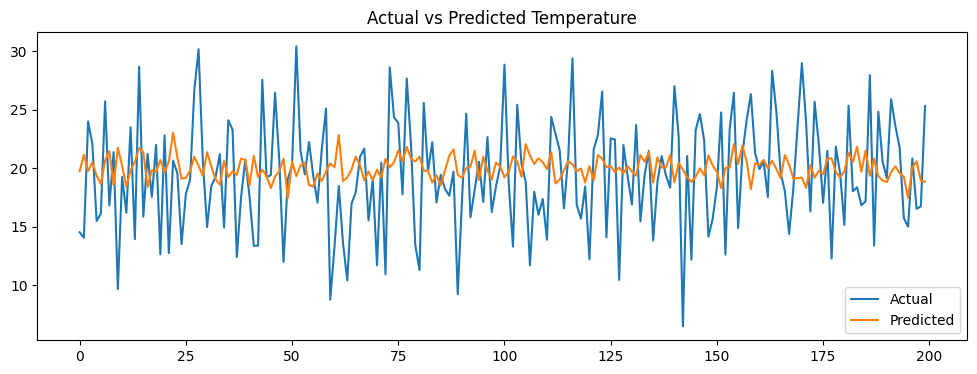

In [22]:
plt.figure(figsize=(12,4))
plt.plot(y_test[:200], label="Actual")
plt.plot(y_pred[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.show()
